In [16]:
import numpy as np
import matplotlib.pyplot as plt

import lmfit
from lmfit import Parameter, Parameters 

from sivqed.models.cavity import Cavity, MultiQubitCavity
import sivqed.models.fitter as fitter
from sivqed.models.fitter import single_siv_ref_model, two_siv_ref_model

plt.rcParams['font.size'] = 18

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 161
    # data points      = 1000
    # variables        = 8
    chi-square         = 0.79503348
    reduced chi-square = 8.0145e-04
    Akaike info crit   = -7121.12633
    Bayesian info crit = -7081.86429
[[Variables]]
    w_up:      17.4954052 +/- 0.01520184 (0.09%) (init = 30)
    g_up:      5.56080918 +/- 0.04259581 (0.77%) (init = 1)
    gamma_up:  0.10856447 +/- 0.01299027 (11.97%) (init = 1)
    w_c:       0.07447642 +/- 0.06261094 (84.07%) (init = 1)
    k_in:      16.4503803 +/- 1.56980819 (9.54%) (init = 15)
    k_tot:     33.3279551 +/- 0.37002287 (1.11%) (init = 30)
    A:         1.01364451 +/- 0.00898682 (0.89%) (init = 1)
    B:         0.04784952 +/- 0.00369967 (7.73%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(k_in, B)         =  0.859
    C(k_tot, A)        =  0.823
    C(gamma_up, k_in)  = -0.734
    C(gamma_up, B)     = -0.563
    C(gamma_up, A)     =  0.507
  

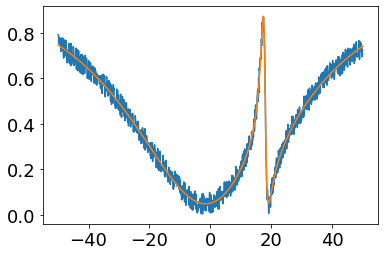

In [14]:
w_arr = np.linspace(-50, 50, 1000)
c = Cavity()
data = c.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1 # Generate data
plt.plot(w_arr, data)

params = Parameters()
params.add_many(
    Parameter('w_up', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up', value=1, min=0, max=np.inf),
    Parameter('gamma_up', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = single_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, single_siv_ref_model.eval(results.params, w=w_arr))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 370
    # data points      = 1000
    # variables        = 11
    chi-square         = 0.82414049
    reduced chi-square = 8.3331e-04
    Akaike info crit   = -7079.16954
    Bayesian info crit = -7025.18423
[[Variables]]
    w_up_1:      17.5240293 +/- 0.02480652 (0.14%) (init = 30)
    g_up_1:      5.65362042 +/- 0.06789326 (1.20%) (init = 1)
    gamma_up_1:  0.10541086 +/- 0.01967360 (18.66%) (init = 1)
    w_up_2:      150.043189 +/- 0.03373114 (0.02%) (init = 148)
    g_up_2:      5.62829893 +/- 0.42685702 (7.58%) (init = 1)
    gamma_up_2:  0.06550447 +/- 0.02857429 (43.62%) (init = 1)
    w_c:        -0.12128716 +/- 0.10789294 (88.96%) (init = 1)
    k_in:        17.8285172 +/- 2.22134312 (12.46%) (init = 15)
    k_tot:       33.2292261 +/- 0.19931357 (0.60%) (init = 30)
    A:           1.00517332 +/- 0.01896364 (1.89%) (init = 1)
    B:           0.04585325 +/- 0.01895834 (41.35%) (init = 0)
[[Correla

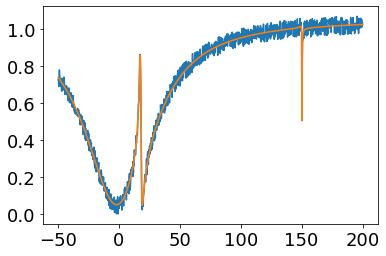

In [36]:
m = MultiQubitCavity(None, [{}, {"w_up": 150}])
w_arr = np.linspace(-50, 200, 1000)
data = m.reflectance(w_arr, 1) + np.random.random(len(w_arr)) * 0.1
plt.plot(w_arr, data)

params = Parameters()
params.add_many(
    Parameter('w_up_1', value=30, min=-np.inf, max=np.inf),
    Parameter('g_up_1', value=1, min=0, max=np.inf),
    Parameter('gamma_up_1', value=1, min=0, max=np.inf),
    Parameter('w_up_2', value=148, min=-np.inf, max=np.inf),
    Parameter('g_up_2', value=1, min=0, max=np.inf),
    Parameter('gamma_up_2', value=1, min=0, max=np.inf),
    Parameter('w_c', value=1, min=-np.inf, max=np.inf),
    Parameter('k_in', value=15, min=0, max=np.inf),
    Parameter('k_tot', value=30, min=0, max=np.inf),
    Parameter('A', value=1, min=0, max=np.inf),
    Parameter('B', value=0, min=-np.inf, max=np.inf),
)

results = two_siv_ref_model.fit(data, params, w=w_arr)
lmfit.report_fit(results)

plt.plot(w_arr, two_siv_ref_model.eval(results.params, w=w_arr))